# Automação de processos

1. buscar, de forma automatica, informaçoes de ações da bolsa de valores
2. criar as analises solicitadas pelo Gestor
3. enviar, automaticamente, um email com os resultados das ánalises 
4. bibliotecas : yfinance , pyautogui , pyperclip

In [1]:
 pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

/tmp/ipykernel_2028/1520825411.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  primeiro_preco= historico[0] #primeiro valor
/tmp/ipykernel_2028/1520825411.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ultimo_preco= historico[-1] #ultimo valor
/tmp/ipykernel_2028/1520825411.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  preco_atual= historico[-1] #preço atual do ticker
/tmp/ipykernel_2028/1520825411.py:23: FutureWarnin

A ação teve uma queda de -15.23% durante o período.


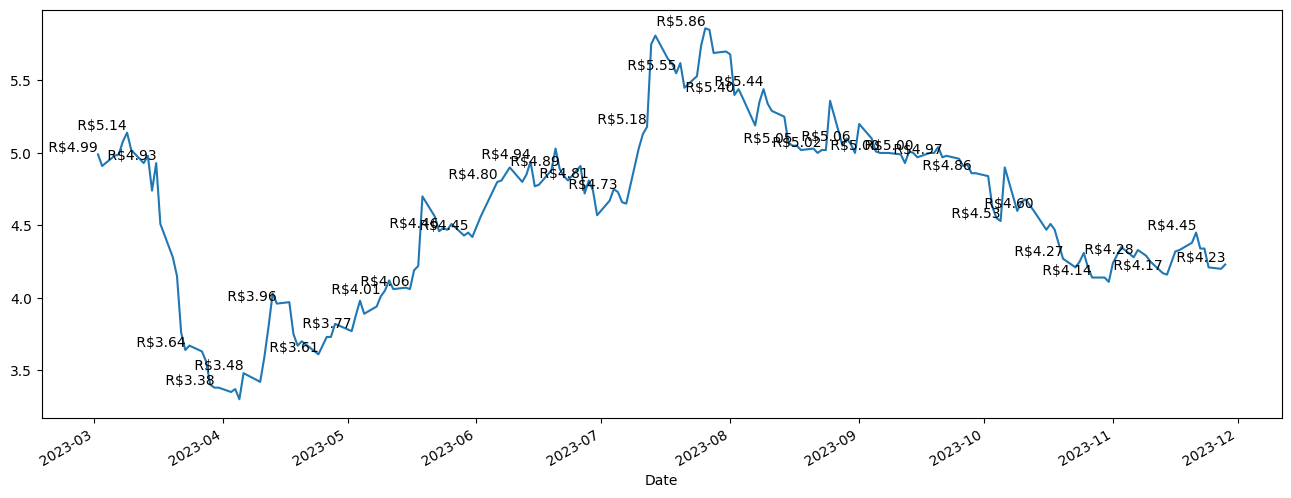

In [19]:
ticker= 'PMAM3.SA' 
preco= yf.Ticker(ticker).history(period='186d') # 
historico= preco['Close'] # preços de fechamento

primeiro_preco= historico[0] #primeiro valor
ultimo_preco= historico[-1] #ultimo valor
preco_atual= historico[-1] #preço atual do ticker

porcentagem= ((ultimo_preco - primeiro_preco) / primeiro_preco) * 100 # 

if porcentagem > 0:
    print(f"A ação teve um aumento de {porcentagem:.2f}% durante o período.")
elif porcentagem < 0:
    print(f"A ação teve uma queda de {(porcentagem):.2f}% durante o período.")
else:
    print("Não houve mudança no preço da ação durante o período.")

plt.figure(figsize=(16,6))
historico.plot()

# Adicionando o preço das ações em cada ponto do gráfico
for i in range(0,len(historico), 5):
    plt.text(historico.index[i], historico[i], f' R${historico[i]:.2f}', fontsize=10, ha='right', va='bottom')

plt.show()



/tmp/ipykernel_2028/296712276.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(historico.index[i], historico[i], f' R${historico[i]:.2f}', fontsize=10, ha='right', va='bottom')
/tmp/ipykernel_2028/296712276.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(historico.index[-1], historico[-1], color='black')
/tmp/ipykernel_2028/296712276.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(historic

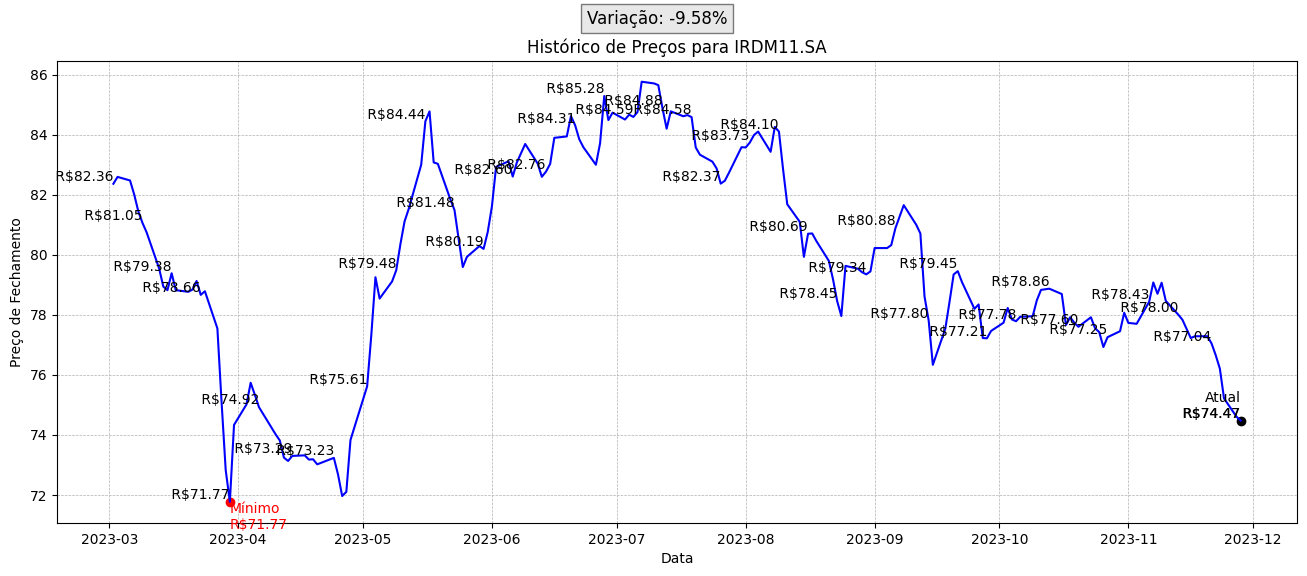

In [21]:
# Definindo a ação
acao = 'IRDM11.SA'

# Coletando preços dos últimos 62 dias
preco = yf.Ticker(acao).history(period='186d')
historico = preco['Close']

# Calculando mudança percentual
primeiro_preco = historico.iloc[0]
ultimo_preco = historico.iloc[-1]
porcentagem_mudanca = ((ultimo_preco - primeiro_preco) / primeiro_preco) * 100

# Encontrando o ponto mínimo no período
ponto_minimo = historico.idxmin()
valor_ponto_minimo = historico.min()

# Imprimindo informações sobre a mudança percentual no gráfico
info_text = f'Variação: {porcentagem_mudanca:.2f}%'
plt.figure(figsize=(16, 6))
plt.figtext(0.5, 0.95, info_text, ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

# Configurando o gráfico
plt.plot(historico, label='Preço de Fechamento', color='blue')

# Adicionando linhas de grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando o preço das ações em cada ponto do gráfico
for i in range(0, len(historico), 5):
    plt.text(historico.index[i], historico[i], f' R${historico[i]:.2f}', fontsize=10, ha='right', va='bottom')

# Adicionando marcador para o ponto mínimo com valor e rótulo "Mínimo" (cor verde)
plt.scatter(ponto_minimo, valor_ponto_minimo, color='red')
plt.text(ponto_minimo, valor_ponto_minimo, f'Mínimo\nR${valor_ponto_minimo:.2f}', fontsize=10, ha='left', va='top', color='red')

# Adicionando marcador para o preço atual com valor e rótulo "Atual" (cor vermelha)
plt.scatter(historico.index[-1], historico[-1], color='black')
plt.text(historico.index[-1], historico[-1], f'Atual\nR${historico[-1]:.2f}', fontsize=10, ha='right', va='bottom', color='black')

# Adicionando rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title(f'Histórico de Preços para {acao}')

plt.show()

# Gerar análises

1. 6 meses dos valores das ações
2. cotação maxima
3. cotação minima
4. media dos preços
5. cotação atual

/tmp/ipykernel_2028/2311692112.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  preco_atual = round(float(historico[-1]), 2)


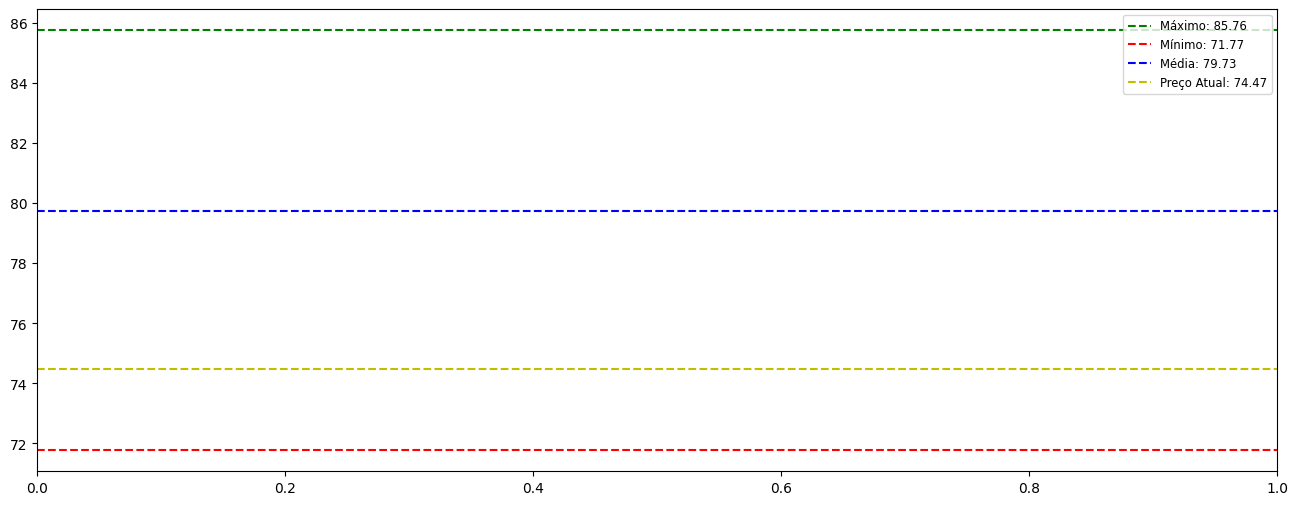

In [22]:
maxima = round(historico.max(), 2)
minima = round(historico.min(), 2)
media= round(historico.mean(), 2)
preco_atual = round(float(historico[-1]), 2)

plt.figure(figsize=(16,6))
plt.axhline(y=maxima, color='g', linestyle='--', label=f'Máximo: {maxima}')
plt.axhline(y=minima, color='r', linestyle='--', label=f'Mínimo: {minima}')
plt.axhline(y=media, color='b', linestyle='--', label=f'Média: {media}')
plt.axhline(y=preco_atual, color='y', linestyle='--', label=f'Preço Atual: {preco_atual}')

plt.legend(fontsize='small')

plt.show()

In [5]:
pip install cryptocompare


Note: you may need to restart the kernel to use updated packages.


In [2]:
import cryptocompare

# Ticker para o Bitcoin em dólares (USD)
ticker_btc = 'BTC'

# Obtenha o histórico de preços para o Bitcoin
historico_btc = cryptocompare.get_historical_price_day(
    ticker_btc,
    currency='USD',
    limit=186  # número de dias de histórico desejado
)

# Crie um DataFrame para facilitar a manipulação dos dados
import pandas as pd

df_btc = pd.DataFrame(historico_btc)
df_btc['time'] = pd.to_datetime(df_btc['time'], unit='s')  # Converta a coluna de tempo para o formato datetime
df_btc.set_index('time', inplace=True)  # Defina a coluna de tempo como índice

# Extraia as informações desejadas
primeiro_preco_btc = df_btc['close'].iloc[0]
ultimo_preco_btc = df_btc['close'].iloc[-1]
preco_atual_btc = df_btc['close'].iloc[-1]

# Exiba os resultados
print(f"Primeiro preço do Bitcoin: {primeiro_preco_btc}")
print(f"Último preço do Bitcoin: {ultimo_preco_btc}")
print(f"Preço atual do Bitcoin: {preco_atual_btc}")


Primeiro preço do Bitcoin: 26719.7
Último preço do Bitcoin: 37496.97
Preço atual do Bitcoin: 37496.97


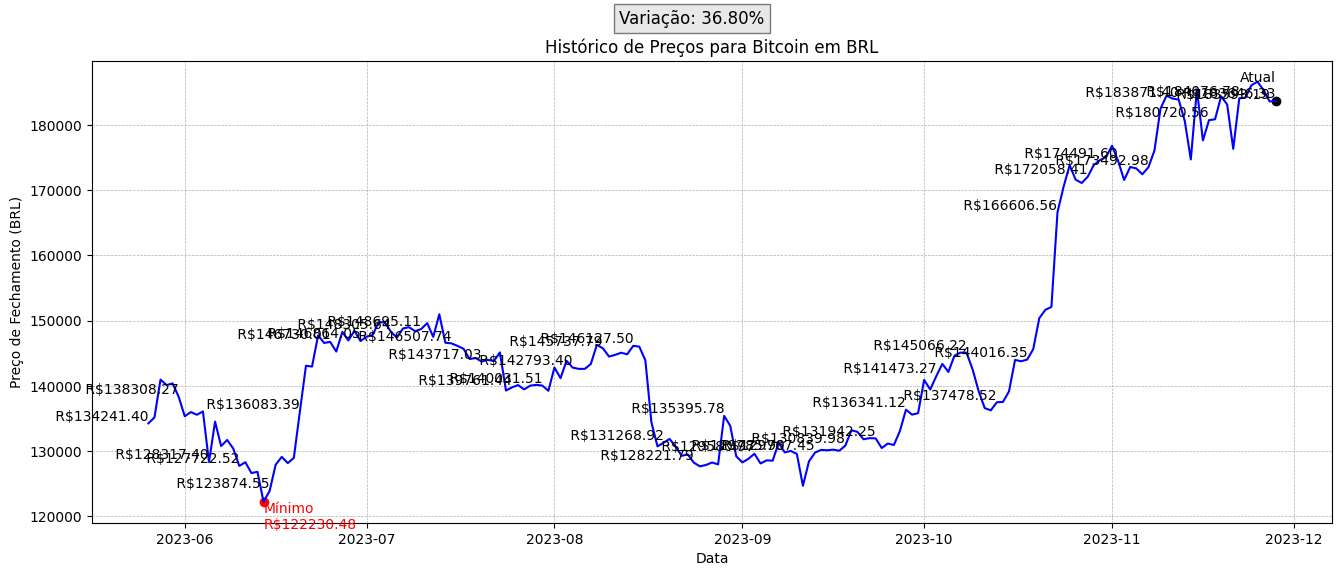

In [11]:
# Ticker para o Bitcoin em Real (BRL)
ticker_btc_brl = 'BTC'

# Obtenha o histórico de preços para o Bitcoin em relação ao Real (BRL)
historico_btc_brl = cryptocompare.get_historical_price_day(
    ticker_btc_brl,
    currency='BRL',
    limit=186  # número de dias de histórico desejado
)

# Crie um DataFrame para facilitar a manipulação dos dados
df_btc_brl = pd.DataFrame(historico_btc_brl)
df_btc_brl['time'] = pd.to_datetime(df_btc_brl['time'], unit='s')  # Converta a coluna de tempo para o formato datetime
df_btc_brl.set_index('time', inplace=True)  # Defina a coluna de tempo como índice

# Encontrando o ponto mínimo no período
ponto_minimo_btc_brl = df_btc_brl['close'].idxmin()
valor_ponto_minimo_btc_brl = df_btc_brl['close'].min()

# Calculando a variação percentual
porcentagem_mudanca_btc_brl = ((df_btc_brl['close'].iloc[-1] - df_btc_brl['close'].iloc[0]) / df_btc_brl['close'].iloc[0]) * 100

# Imprimindo informações sobre a mudança percentual no gráfico
info_text_btc_brl = f'Variação: {porcentagem_mudanca_btc_brl:.2f}%'
plt.figure(figsize=(16, 6))
plt.figtext(0.5, 0.95, info_text_btc_brl, ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

# Configurando o gráfico
plt.plot(df_btc_brl['close'], label='Preço de Fechamento', color='blue')

# Adicionando linhas de grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando o preço do Bitcoin em cada ponto do gráfico
for i in range(0, len(df_btc_brl), 5):
    plt.text(df_btc_brl.index[i], df_btc_brl['close'].iloc[i], f' R${df_btc_brl["close"].iloc[i]:.2f}', fontsize=10, ha='right', va='bottom')

# Adicionando marcador para o ponto mínimo com valor e rótulo "Mínimo" (cor verde)
plt.scatter(ponto_minimo_btc_brl, valor_ponto_minimo_btc_brl, color='red')
plt.text(ponto_minimo_btc_brl, valor_ponto_minimo_btc_brl, f'Mínimo\nR${valor_ponto_minimo_btc_brl:.2f}', fontsize=10, ha='left', va='top', color='red')

# Adicionando marcador para o preço atual com valor e rótulo "Atual" (cor vermelha)
plt.scatter(df_btc_brl.index[-1], df_btc_brl['close'].iloc[-1], color='black')
plt.text(df_btc_brl.index[-1], df_btc_brl['close'].iloc[-1], f'Atual\nR${df_btc_brl["close"].iloc[-1]:.2f}', fontsize=10, ha='right', va='bottom', color='black')

# Adicionando rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (BRL)')
plt.title(f'Histórico de Preços para Bitcoin em BRL')

plt.show()


[*********************100%%**********************]  1 of 1 completed


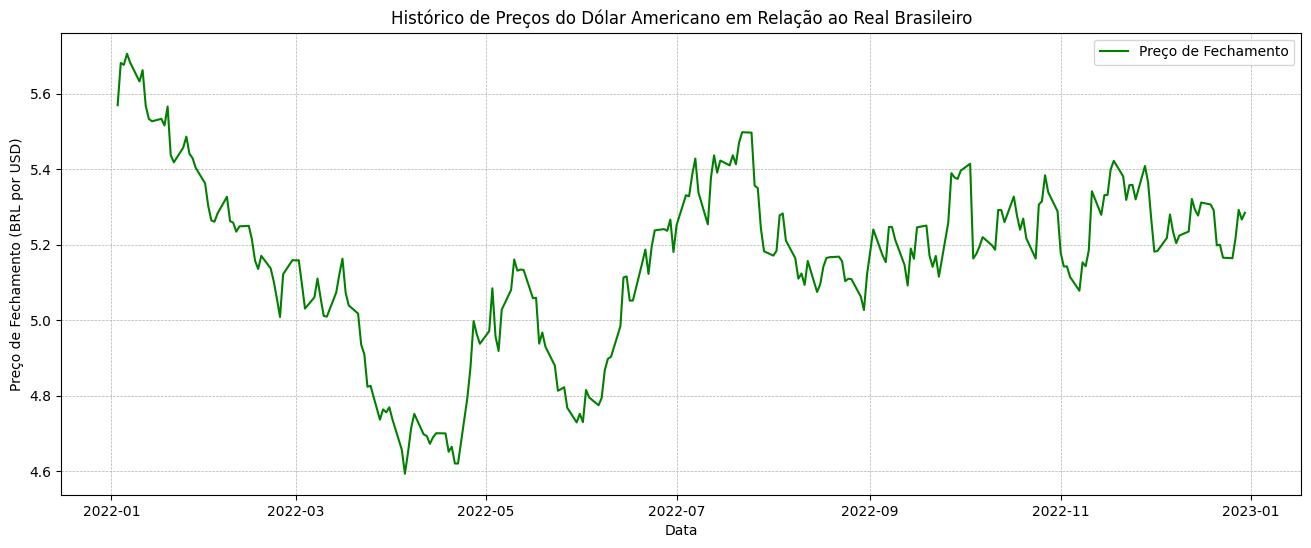

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

# Ticker para o par de moedas Dólar Americano / Real Brasileiro
ticker_usd_brl = 'USDBRL=X'

# Obtenha o histórico de preços para o Dólar em relação ao Real
historico_usd_brl = yf.download(ticker_usd_brl, start='2022-01-01', end='2023-01-01')

# Configurando o gráfico
plt.figure(figsize=(16, 6))
plt.plot(historico_usd_brl['Close'], label='Preço de Fechamento', color='green')

# Adicionando linhas de grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (BRL por USD)')
plt.title('Histórico de Preços do Dólar Americano em Relação ao Real Brasileiro')

# Adicionando legenda
plt.legend()

plt.show()


[*********************100%%**********************]  1 of 1 completed


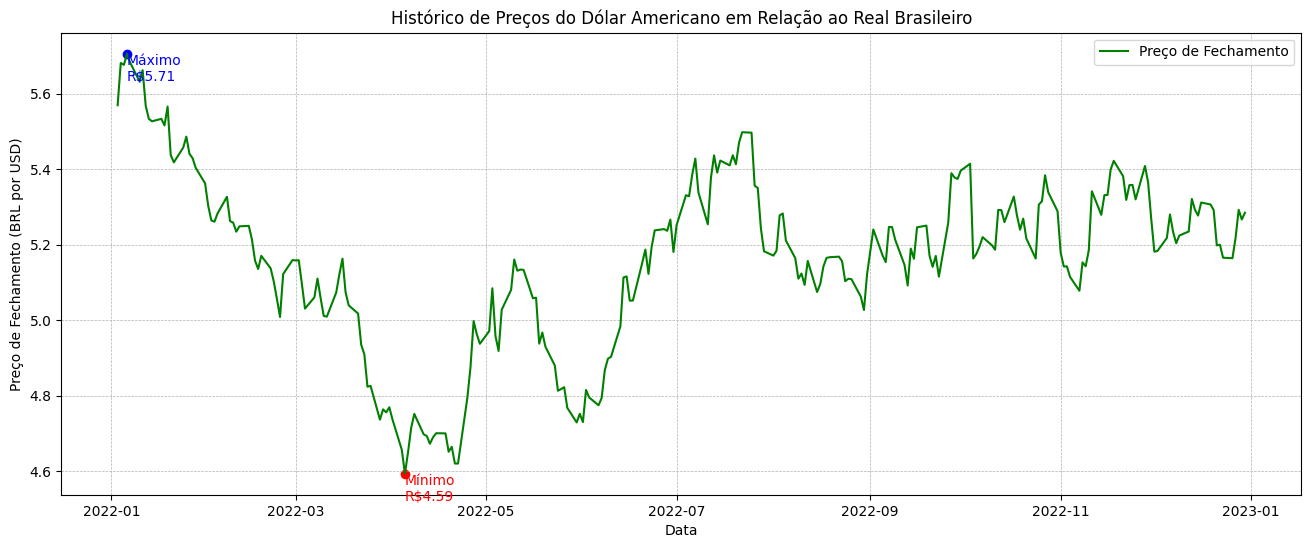

In [13]:
# Ticker para o par de moedas Dólar Americano / Real Brasileiro
ticker_usd_brl = 'USDBRL=X'

# Obtenha o histórico de preços para o Dólar em relação ao Real
historico_usd_brl = yf.download(ticker_usd_brl, start='2022-01-01', end='2023-01-01')

# Encontrando o ponto mínimo e máximo no período
ponto_minimo = historico_usd_brl['Close'].idxmin()
valor_ponto_minimo = historico_usd_brl['Close'].min()

ponto_maximo = historico_usd_brl['Close'].idxmax()
valor_ponto_maximo = historico_usd_brl['Close'].max()

# Configurando o gráfico
plt.figure(figsize=(16, 6))
plt.plot(historico_usd_brl['Close'], label='Preço de Fechamento', color='green')

# Adicionando linhas de grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (BRL por USD)')
plt.title('Histórico de Preços do Dólar Americano em Relação ao Real Brasileiro')

# Adicionando marcador para o ponto mínimo com valor e rótulo "Mínimo" (cor vermelha)
plt.scatter(ponto_minimo, valor_ponto_minimo, color='red')
plt.text(ponto_minimo, valor_ponto_minimo, f'Mínimo\nR${valor_ponto_minimo:.2f}', fontsize=10, ha='left', va='top', color='red')

# Adicionando marcador para o ponto máximo com valor e rótulo "Máximo" (cor azul)
plt.scatter(ponto_maximo, valor_ponto_maximo, color='blue')
plt.text(ponto_maximo, valor_ponto_maximo, f'Máximo\nR${valor_ponto_maximo:.2f}', fontsize=10, ha='left', va='top', color='blue')

# Adicionando legenda
plt.legend()

plt.show()


[*********************100%%**********************]  1 of 1 completed


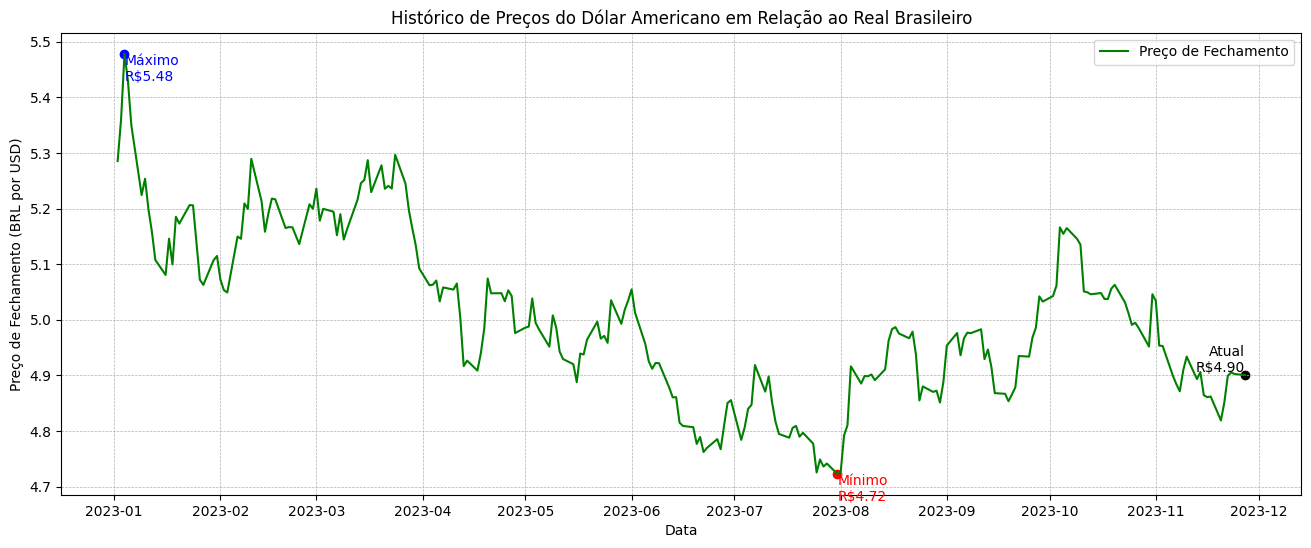

In [16]:
# Ticker para o par de moedas Dólar Americano / Real Brasileiro
ticker_usd_brl = 'USDBRL=X'

# Obtenha o histórico de preços para o Dólar em relação ao Real
historico_usd_brl = yf.download(ticker_usd_brl, start='2023-01-01', end='2023-11-28')

# Encontrando o ponto mínimo, máximo e atual no período
ponto_minimo = historico_usd_brl['Close'].idxmin()
valor_ponto_minimo = historico_usd_brl['Close'].min()

ponto_maximo = historico_usd_brl['Close'].idxmax()
valor_ponto_maximo = historico_usd_brl['Close'].max()

ponto_atual = historico_usd_brl.index[-1]
valor_ponto_atual = historico_usd_brl['Close'].iloc[-1]

# Configurando o gráfico
plt.figure(figsize=(16, 6))
plt.plot(historico_usd_brl['Close'], label='Preço de Fechamento', color='green')

# Adicionando linhas de grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (BRL por USD)')
plt.title('Histórico de Preços do Dólar Americano em Relação ao Real Brasileiro')

# Adicionando marcador para o ponto mínimo com valor e rótulo "Mínimo" (cor vermelha)
plt.scatter(ponto_minimo, valor_ponto_minimo, color='red')
plt.text(ponto_minimo, valor_ponto_minimo, f'Mínimo\nR${valor_ponto_minimo:.2f}', fontsize=10, ha='left', va='top', color='red')

# Adicionando marcador para o ponto máximo com valor e rótulo "Máximo" (cor azul)
plt.scatter(ponto_maximo, valor_ponto_maximo, color='blue')
plt.text(ponto_maximo, valor_ponto_maximo, f'Máximo\nR${valor_ponto_maximo:.2f}', fontsize=10, ha='left', va='top', color='blue')

# Adicionando marcador para o ponto atual com valor e rótulo "Atual" (cor preta)
plt.scatter(ponto_atual, valor_ponto_atual, color='black')
plt.text(ponto_atual, valor_ponto_atual, f'Atual\nR${valor_ponto_atual:.2f}', fontsize=10, ha='right', va='bottom', color='black')

# Adicionando legenda
plt.legend()

plt.show()
